# Vehicles data Preprocessing

### The following sources have been used:

Vehicles data: https://data.gov.uk/dataset/road-accidents-safety-data

In [1]:
'''
RTA Vehicles file creation

'''
import pandas as pd
import glob
import os
import time
import sys

###print(os.getcwd())

start_time0 = time.time()

# file i/o
csv_loader ='Specs/Vehicles_FLM.csv'
csv_in = 'Data/Vehicles_2015.csv'
csv_out = 'Data/Vehicles.csv'

#load field name mapper
pfl = pd.read_csv(csv_loader, low_memory=False)
pc_cols_rename = dict(pfl[['field_name','field_descriptor']].where(pfl['import']=='Y').dropna().values.tolist())
pc_cols_drop = pfl['field_name'].where(pfl['import']=='N').dropna().values.tolist()

#load Vehicles file
Vehicles = pd.read_csv(csv_in,low_memory=False)

#clean up data
Vehicles.drop(pc_cols_drop, axis=1, inplace=True)
Vehicles.rename(columns=pc_cols_rename, inplace=True)
###postcodes.drop_duplicates()
###postcodes.info()

#save for later
try:
    Vehicles.to_csv(csv_out, index=False)
except IOError as (errno, strerror):
    print 'I/O error({0}): {1}'.format(errno, strerror)
    if errno == 13:
        print '*** check to see if (someone has) file already open ***'
except:
    print "Unexpected error:", sys.exc_info()[0]
    raise
    
print "Vehicles dataload: %s seconds " % (time.time() - start_time0)

Vehicles dataload: 1.81799983978 seconds 


In [2]:
'''
RTA Vehicles load

'''
import pandas as pd
import os
import time

print(os.getcwd())

#Load Vehicles data
csv_in = 'Data/Vehicles.csv'
Vehicles = pd.read_csv(csv_in)


C:\GA\RTA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257845 entries, 0 to 257844
Data columns (total 12 columns):
accident_index                 257845 non-null object
vehicle_reference              257845 non-null int64
vehicle_type                   257845 non-null int64
towing_and_articulation        257845 non-null int64
vehicle_manoeuvre              257845 non-null int64
junction_location              257845 non-null int64
was_vehicle_left_hand_drive    257845 non-null int64
sex_of_driver                  257845 non-null int64
age_of_driver                  257845 non-null int64
engine_capacity_(cc)           257845 non-null int64
propulsion_code                257845 non-null int64
age_of_vehicle                 257845 non-null int64
dtypes: int64(11), object(1)
memory usage: 23.6+ MB
None


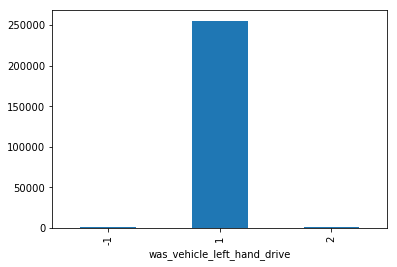

In [3]:
'''
RTA Vehicles check data

'''

import matplotlib.pyplot as plt
%matplotlib inline

# check data
print(Vehicles.info())
col = 'was_vehicle_left_hand_drive'
Vehicles.groupby([col])[col].count().plot(kind='bar')
plt.show()

#print(Vehicles.groupby([col])[col].count())